In [42]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [44]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime

# Reflect Tables into SQLAlchemy ORM

In [47]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [49]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [51]:
# reflect an existing database into a new model
Base = automap_base()
    
# reflect the tables
Base.prepare(autoload_with=engine)

In [53]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [55]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [57]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [60]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(Measurement.date)).first()[0]
most_recent_date

'2017-08-23'

<Axes: xlabel='Date', ylabel='Inches'>

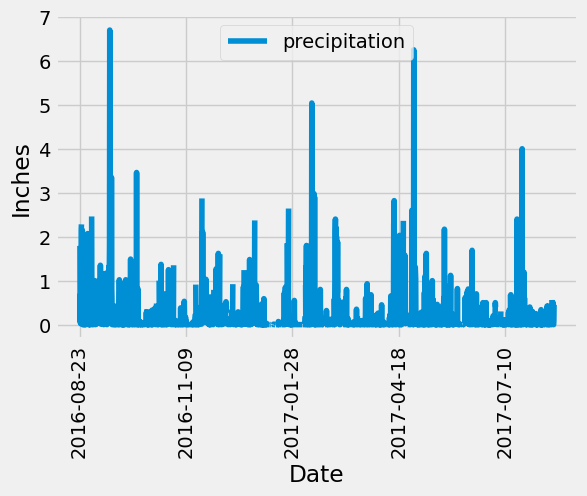

In [62]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
twelve_months_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
query_scores = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= twelve_months_ago).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(query_scores, columns=['date','precipitation'])
df.set_index('date',  inplace=True)

# Sort the dataframe by date
df = df.sort_values(by='date')

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(rot=90, xlabel = 'Date', ylabel='Inches', figsize=(6,4))

In [63]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [67]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(Station).count()
total_stations

9

In [69]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

active_station = session.query(Measurement.station, func.count(Measurement.station)).\
                    group_by(Measurement.station).\
                    order_by(func.count(Measurement.station).desc()).all()
active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [83]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
lowest_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == 'USC00519281').first()
highest_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == 'USC00519281').first()
average_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').first()
# print temperatures
lowest_temp, highest_temp, average_temp


((54.0,), (85.0,), (71.66378066378067,))

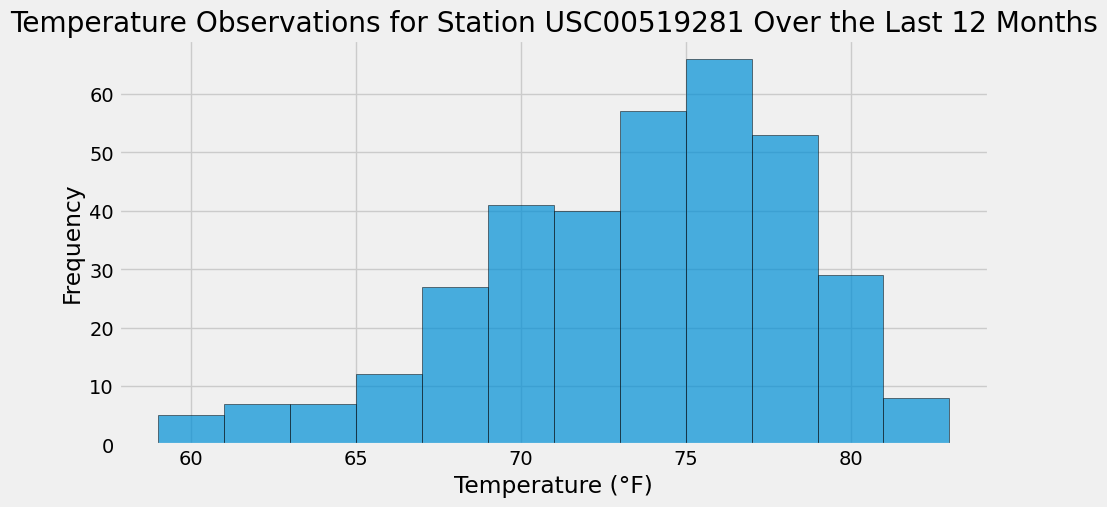

In [95]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Define the station ID
station_id = 'USC00519281'

# Get the most recent date from the database
most_recent_date = session.query(func.max(Measurement.date)).first()[0]

# Convert the most recent date string to a datetime object
most_recent_date_dt = datetime.strptime(most_recent_date, "%Y-%m-%d")

# Calculate the date 12 months prior to the most recent date
twelve_months_ago = most_recent_date_dt - pd.DateOffset(months=12)

# Convert `twelve_months_ago` to a string format
twelve_months_ago_str = twelve_months_ago.strftime('%Y-%m-%d')

# Query for temperature data for the last 12 months for the most active station
data = session.query(Measurement.tobs).\
        filter(Measurement.station == station_id).\
        filter(Measurement.date >= twelve_months_ago_str).all()

# Convert the query results to a Pandas DataFrame
station_df = pd.DataFrame(data, columns=['tobs'])

# Plot the temperature data as a histogram
plt.figure(figsize=(10, 5))
station_df['tobs'].plot.hist(bins=12, edgecolor='black', alpha=0.7)
plt.title('Temperature Observations for Station USC00519281 Over the Last 12 Months')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


# Close Session

In [16]:
# Close Session
session.close()